In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

There is 2 ways to import the dataset (method 1- Google Drive method , method 2- upload from local storage)

In [ ]:
#method 1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/datasett/fer2013.csv"
data = pd.read_csv(path)

In [ ]:
#method 2 
from google.colab import files
uploaded = files.upload()


Saving fer2013.csv to fer2013.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['fer2013.csv']))

In [ ]:
labels=data.iloc[:,[0]].values

In [ ]:
#Reading of pixels from dataset
pixels=data['pixels']

In [ ]:
#The facial expressions that the software is classifying  
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from tensorflow.keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [ ]:
#preprocessing of converting the pixels from the dataset to gray scale images (4x4 pixels)
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')

Example shown below of an image that was converted togther with its label

'Angry'

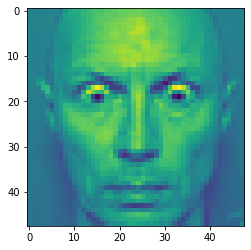

In [ ]:
plt.imshow(images[15][:,:,0])
Expressions[labels[2][0]]

Data is split between training and test sets

In [ ]:
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [ ]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

The CNN model implemention (convolution,batch normalization,max pooling,flatten and dense layers)

In [ ]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [ ]:
classes=7
model = create_convolutional_model(classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        160       
                                                                 
 batch_normalization (BatchN  (None, 47, 47, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        8256      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       2

In [ ]:
#training the CNN model with 30 epochs
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=2)

Epoch 1/30
274/274 - 52s - loss: 1.8681 - accuracy: 0.3301 - 52s/epoch - 190ms/step
Epoch 2/30
274/274 - 21s - loss: 1.4875 - accuracy: 0.4423 - 21s/epoch - 76ms/step
Epoch 3/30
274/274 - 21s - loss: 1.3334 - accuracy: 0.4918 - 21s/epoch - 76ms/step
Epoch 4/30
274/274 - 21s - loss: 1.2131 - accuracy: 0.5388 - 21s/epoch - 77ms/step
Epoch 5/30
274/274 - 21s - loss: 1.1280 - accuracy: 0.5702 - 21s/epoch - 77ms/step
Epoch 6/30
274/274 - 21s - loss: 1.0765 - accuracy: 0.5928 - 21s/epoch - 77ms/step
Epoch 7/30
274/274 - 21s - loss: 1.0052 - accuracy: 0.6225 - 21s/epoch - 77ms/step
Epoch 8/30
274/274 - 21s - loss: 0.9245 - accuracy: 0.6550 - 21s/epoch - 78ms/step
Epoch 9/30
274/274 - 21s - loss: 0.8393 - accuracy: 0.6893 - 21s/epoch - 78ms/step
Epoch 10/30
274/274 - 21s - loss: 0.7477 - accuracy: 0.7228 - 21s/epoch - 78ms/step
Epoch 11/30
274/274 - 21s - loss: 0.6703 - accuracy: 0.7529 - 21s/epoch - 78ms/step
Epoch 12/30
274/274 - 21s - loss: 0.5902 - accuracy: 0.7817 - 21s/epoch - 78ms/step


In [ ]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Confusion Matrix is developed and displayed

Normalized confusion matrix
[[4.97398543e-01 4.16233091e-03 8.94901145e-02 7.59625390e-02
  2.09157128e-01 1.35275754e-02 1.10301769e-01]
 [1.98113208e-01 4.43396226e-01 8.49056604e-02 5.66037736e-02
  1.50943396e-01 1.88679245e-02 4.71698113e-02]
 [1.12326044e-01 3.97614314e-03 4.48310139e-01 5.36779324e-02
  2.10735586e-01 5.86481113e-02 1.12326044e-01]
 [3.81056070e-02 0.00000000e+00 1.74197060e-02 8.04028307e-01
  6.53238977e-02 1.30647795e-02 6.20577028e-02]
 [1.02299762e-01 7.93021412e-04 9.83346550e-02 5.39254560e-02
  5.69389374e-01 1.11022998e-02 1.64155432e-01]
 [3.62953692e-02 2.50312891e-03 1.16395494e-01 8.63579474e-02
  4.38047559e-02 6.82102628e-01 3.25406758e-02]
 [8.02980132e-02 2.48344371e-03 8.19536424e-02 9.93377483e-02
  1.98675497e-01 1.57284768e-02 5.21523179e-01]]


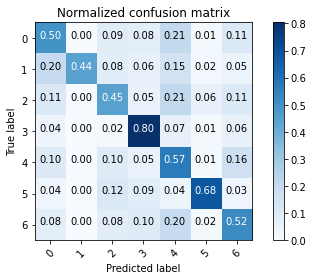

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
#weights are saved
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)

In [ ]:
filename='model_weights.hdf5'
model.load_weights(filename)

Face detection and webcam initialization ( using defined webcam snippet and pretrained haar cascade function)

In [ ]:
#Prediction Function of live feed to model
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
# string -> array -> image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
# array -> image -> string
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

Method to start the live facial expression classification process

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    # YH: Obtain the next frame into js_reply, and overlay 'bbox' image obtained from previous frame on next frame.
    js_reply = video_frame(label_html, bbox)

    if not js_reply:
        break
        
    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)

    # get face bounding box for overlay
    # YH: Draw box on blank image
    for (x,y,w,h) in faces:
            sub_face = gray[y:y + h, x:x + w]
            bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
            res = make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(bbox_array, str(Expressions[res]), (x, y - 5), font, 0.5, (205, 200, 50), 1, cv2.LINE_AA)
      

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>